# Title : Analyzing Sales Data from Multiple File Formats

In [222]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

In [223]:
csv = pd.read_csv("./datasets/sales_data_sample.csv", encoding="cp1252")

In [224]:
ed = pd.read_excel("./datasets/Sample-Sales-Data.xlsx")

In [225]:
with open("./datasets/customers.json", "r") as json_file:
    json_data = json.load(json_file)

In [226]:
csv.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [227]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [228]:
csv.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [229]:
csv.dropna()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,Motorcycles,95,S10_1678,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,Classic Cars,214,S10_1949,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,Classic Cars,214,S10_1949,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
51,10391,24,100.00,4,2416.56,3/9/2005 0:00,Shipped,1,3,2005,Classic Cars,214,S10_1949,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,10120,43,76.00,14,3268.00,4/29/2003 0:00,Shipped,2,4,2003,Planes,80,S700_3167,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
2673,10223,26,67.20,15,1747.20,2/20/2004 0:00,Shipped,1,2,2004,Planes,80,S700_3167,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Small
2685,10361,44,100.00,10,5001.92,12/17/2004 0:00,Shipped,4,12,2004,Planes,80,S700_3167,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
2764,10361,35,100.00,11,4277.35,12/17/2004 0:00,Shipped,4,12,2004,Planes,74,S700_4002,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium


In [230]:
csv.drop_duplicates()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [231]:
ed.head()

,Postcode,Sales_Rep_ID,Sales_Rep_Name,Year,Value
0,2121,456,Jane,2011,84219.497311
1,2092,789,Ashish,2012,28322.192268
2,2128,456,Jane,2013,81878.997241
3,2073,123,John,2011,44491.142121
4,2134,789,Ashish,2012,71837.720959


In [232]:
ed.tail()

,Postcode,Sales_Rep_ID,Sales_Rep_Name,Year,Value
385,2164,123,John,2012,88884.535217
386,2193,456,Jane,2013,79440.290813
387,2031,123,John,2011,65643.689454
388,2130,456,Jane,2012,66247.874869
389,2116,456,Jane,2013,3195.699054


In [233]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Postcode        390 non-null    int64  
 1   Sales_Rep_ID    390 non-null    int64  
 2   Sales_Rep_Name  390 non-null    object 
 3   Year            390 non-null    int64  
 4   Value           390 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.4+ KB


In [234]:
ed.describe()

,Postcode,Sales_Rep_ID,Year,Value
count,390.000000,390.000000,390.000000,390.000000
mean,2098.430769,456.000000,2012.000000,49229.388305
std,58.652206,272.242614,0.817545,28251.271309
min,2000.000000,123.000000,2011.000000,106.360599
25%,2044.000000,123.000000,2011.000000,26101.507357
50%,2097.500000,456.000000,2012.000000,47447.363750
75%,2142.000000,789.000000,2013.000000,72277.800608
max,2206.000000,789.000000,2013.000000,99878.489209


In [235]:
unified_data = pd.concat([csv, ed], ignore_index=True)

In [236]:
total_sales = unified_data['SALES'].sum()
print("Total Sales:", total_sales)

Total Sales: 10032628.85


In [237]:
category_sales = unified_data.groupby('ORDERNUMBER')['SALES'].mean()
category_sales

ORDERNUMBER
10100.0    3033.312500
10101.0    2858.085000
10102.0    3432.025000
10103.0    3418.875000
10104.0    3432.458462
              ...     
10421.0    3630.875000
10422.0    3083.400000
10423.0    1682.390000
10424.0    5855.556667
10425.0    3368.053077
Name: SALES, Length: 307, dtype: float64

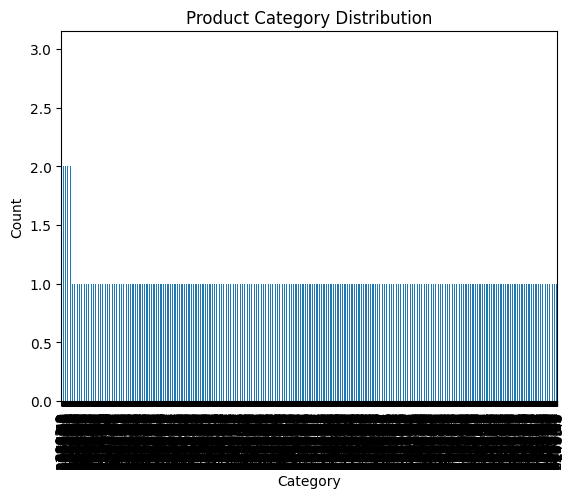

In [238]:
category_counts = unified_data['SALES'].value_counts()
category_counts.plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Total Sales: 19199461.43878344


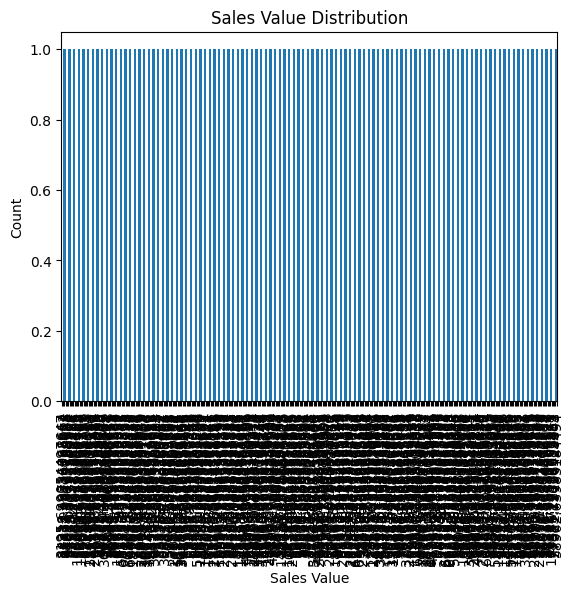

In [239]:
total_sales_value = unified_data['Value'].sum()
print("Total Sales:", total_sales_value)

category_sales = unified_data.groupby('Sales_Rep_Name')['Value'].mean()

category_counts = unified_data['Value'].value_counts()

category_counts.plot(kind='bar')
plt.title('Sales Value Distribution')
plt.xlabel('Sales Value')
plt.ylabel('Count')
plt.show()

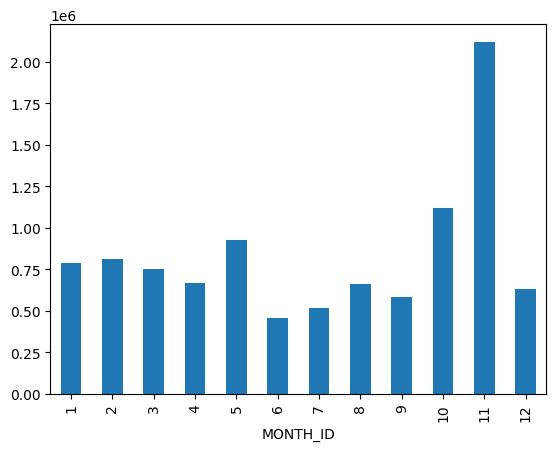

In [240]:
csv.groupby('MONTH_ID')['SALES'].sum().plot(kind='bar')
plt.show()


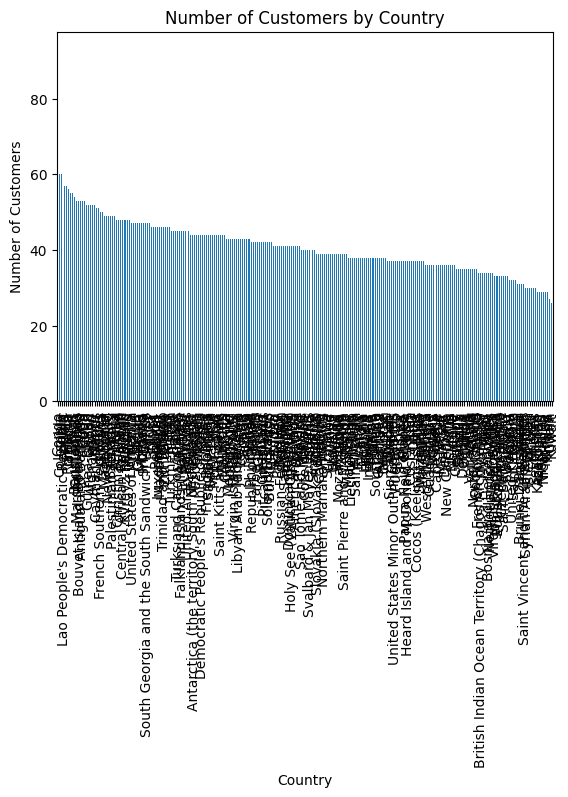

In [241]:
country_counts.plot(kind='bar')
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()


/var/folders/w4/xd__6w7n6psdp5jkzr3rdrj80000gn/T/ipykernel_773/1662793430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_product_line, x='PRODUCTLINE', y='SALES', palette='viridis')


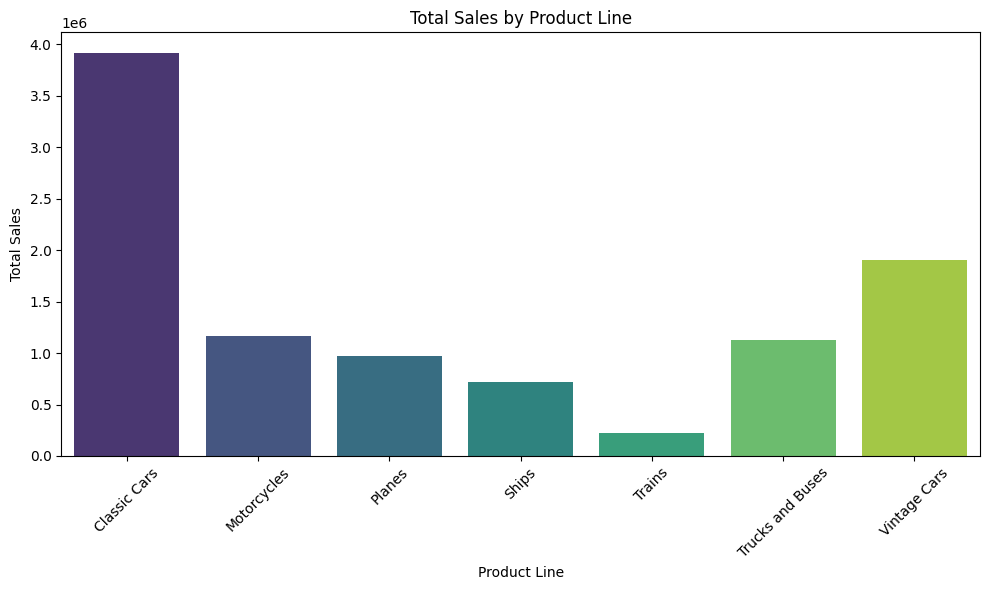

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_by_product_line = csv.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_product_line, x='PRODUCTLINE', y='SALES', palette='viridis')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/w4/xd__6w7n6psdp5jkzr3rdrj80000gn/T/ipykernel_773/890517405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csv, x='YEAR_ID', y='SALES', palette='Set2')


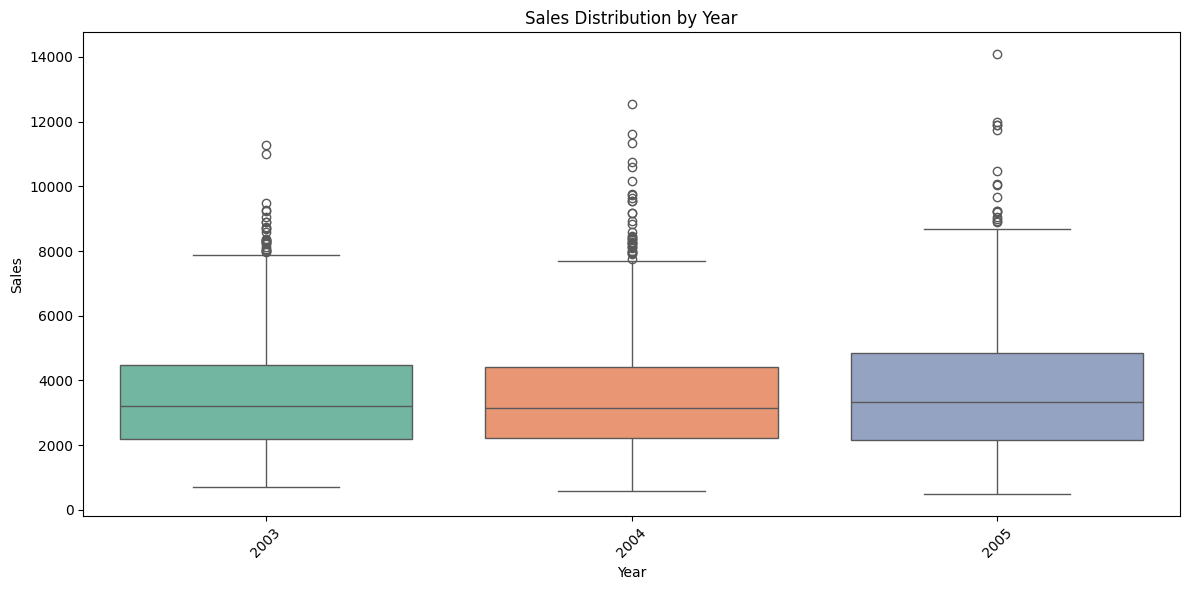

In [243]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=csv, x='YEAR_ID', y='SALES', palette='Set2')
plt.title('Sales Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


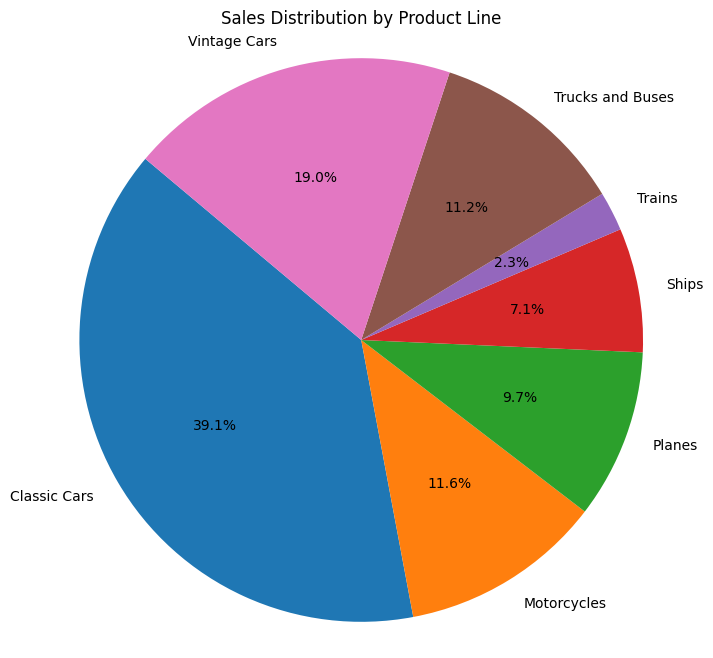

In [244]:

sales_distribution = unified_data.groupby('PRODUCTLINE')['SALES'].sum()


plt.figure(figsize=(8, 8))
plt.pie(sales_distribution, labels=sales_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Product Line')
plt.axis('equal')  
plt.show()


In [245]:
print(unified_data.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'Postcode', 'Sales_Rep_ID', 'Sales_Rep_Name', 'Year',
       'Value'],
      dtype='object')


In [247]:
print(sales_distribution)

PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64
